In [ ]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-06 18:05:10


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
fname = f"/content/drive/MyDrive/NUS/Y4S1/BT4222 (1)/data/feature_eng_combined_v2.csv"

df = pd.read_csv(fname)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,name,artists,artist_ids,track_number,danceability,energy,key,loudness,...,rock,soft rock,southern hip hop,trap,urban contemporary,release_date,release_month,average_year_success,is_success,bert_dense_lyrics
0,0,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],['4dpARuHxo51G3z768sgnrY'],1,0.604,0.366,5,-7.519,...,0,0,0,0,0,14/10/21,2021-10,38,1,0.677761
1,1,4BI4iNZigfF4SUq13TcFPh,INDUSTRY BABY - EXTENDED,"['Lil Nas X', 'Jack Harlow']","['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...",2,0.732,0.708,10,-6.775,...,0,0,0,0,0,9/10/21,2021-10,27,1,0.587171
2,2,58UKC45GPNTflCN6nwCUeF,Fancy Like,['Walker Hayes'],['7sKxqpSqbIzphAKAhrqvlf'],6,0.647,0.765,1,-6.459,...,0,0,0,0,0,21/1/22,2022-01,12,1,0.616422
3,3,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],4,0.807,0.893,11,-3.745,...,0,0,0,0,0,29/10/21,2021-10,22,1,0.596769
4,4,50nfwKoDiSYg8zOCREWAm5,Shivers,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2,0.788,0.859,2,-2.724,...,0,0,0,0,0,29/10/21,2021-10,22,1,0.640173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56830,56830,4lCAS06lKCJiFVGhHqxCtW,Talk About It,['A Boogie Wit da Hoodie'],['31W5EY0aAly4Qieq6OFu6I'],9,0.445,0.584,1,-9.666,...,0,0,0,1,0,18/6/20,2020-06,64,1,0.597523
56831,56831,60xDmDoYJytWs5do9aHI0F,Beat the Odds,['Money Man'],['3Rx4PJ7SP6unkOk5elPUK7'],8,0.787,0.590,10,-7.123,...,0,0,1,1,0,20/3/20,2020-03,-1,0,0.596241
56832,56832,6bAHtwPD7MBjSD8UmZFsh8,Geography,"['Chaos Chaos', 'Kevin Hickey', 'Lucas McCross...","['6D6rjLdxyE5vwhMlkuQq0E', '12Cqmjoj96GR0wFIup...",1,0.522,0.788,10,-5.926,...,0,0,0,0,0,21/2/20,2020-02,-1,0,0.652086
56833,56833,0G9CL2p0TP4kTIXroDR326,twin hearts (feat. YURMS),"['ITSOKTOCRY', 'Yurms']","['2BUUAEl4BwFRA9NBDgMWSf', '2IaEQEZ606L3nZuGnm...",6,0.786,0.609,11,-6.139,...,0,0,0,0,0,6/11/20,2020-11,-1,0,0.560518


Training Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

#Feature selection for training
print(df.columns)
df_model = df.copy().drop(columns=['Unnamed: 0', 'id', 'name', 'artists', 'artist_ids', 'release_date_x', 'release_date', 'date', 'lyrics', 'non_stop_lyrics', 'release_month', 'sentiment'])

#Split train and test set
X, y = df_model.drop(columns=['target']), df_model['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Index(['Unnamed: 0', 'id', 'name', 'artists', 'artist_ids', 'track_number',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'explicit', 'duration_ms', 'date', 'release_date_x', 'lyrics', 'target',
       'length_lyrics', 'unique_length_lyrics', 'title_length',
       'non_stop_lyrics', 'length_lyrics_non', 'unique_length_lyrics_non',
       'sentiment', 'positive', 'neutral', 'negative', 'compound',
       'alternative rock', 'country', 'country rock', 'dance pop', 'folk',
       'gangster rap', 'hip hop', 'indie rock', 'mellow gold', 'pop',
       'pop rap', 'pop rock', 'post-teen pop', 'r&b', 'rap', 'rock',
       'soft rock', 'southern hip hop', 'trap', 'urban contemporary',
       'release_date', 'release_month', 'average_year_success', 'is_success',
       'bert_dense_lyrics'],
      dtype='object')


Check for imbalanced class

In [ ]:
df_model["target"].value_counts()

0    48641
1     8194
Name: target, dtype: int64

Training with SMOTE oversampling minority class

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)

Counter({0: 32660, 1: 32660})


Gaussian Naive Bayes Model without Smote

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean, std
from sklearn.naive_bayes import GaussianNB

# define model
nb = GaussianNB() 

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# evalulate model 
# scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=1)
n_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Mean Accuracy: 0.589 (0.009)


In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))
print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1-score: {f1_score(y_test, pred)}")

              precision    recall  f1-score   support

           0       0.96      0.54      0.69     15981
           1       0.25      0.86      0.38      2775

    accuracy                           0.59     18756
   macro avg       0.60      0.70      0.54     18756
weighted avg       0.85      0.59      0.65     18756

Accuracy: 0.5912774578801451
Precision: 0.24681644062532354
Recall: 0.8590990990990991
F1-score: 0.38346469358211355


In [ ]:
print(f"Micro Average Recall: {recall_score(y_test, pred, average='micro')}")

Micro Average Recall: 0.5912774578801451


In [ ]:
import pickle
filename = 'model_nb.sav'
pickle.dump(nb, open(f"/content/gdrive/My Drive/BT4222_Models/{filename}", 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


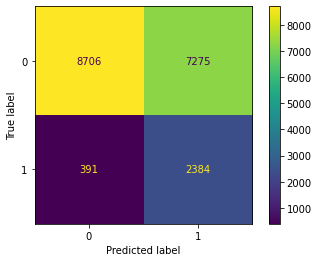

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, X_test, y_test) 

Gaussian Naive Bayes Model without Smote

In [ ]:
# define model
nb2 = GaussianNB() 

nb2.fit(X_train_smote, y_train_smote)

GaussianNB()

In [ ]:
# import pickle
# filename = 'model_nb_smote.sav'
# pickle.dump(nb, open(f"/content/gdrive/My Drive/BT4222_Models/{filename}", 'wb'))

In [ ]:
nb2.score(X_test, y_test)

0.36889528684154405

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [ ]:
predicted = nb2.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.27      0.42     15981
           1       0.18      0.92      0.30      2775

    accuracy                           0.37     18756
   macro avg       0.57      0.60      0.36     18756
weighted avg       0.84      0.37      0.41     18756



In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predicted)}")
print(f"Precision: {precision_score(y_test, predicted)}")
print(f"Recall: {recall_score(y_test, predicted)}")
print(f"Micro Average Recall: {recall_score(y_test, predicted, average='micro')}")
print(f"F1-score: {f1_score(y_test, predicted)}")

Accuracy: 0.36889528684154405
Precision: 0.18055555555555555
Recall: 0.9228828828828829
Micro Average Recall: 0.36889528684154405
F1-score: 0.30202252491302556


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


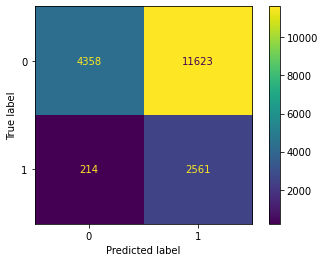

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb2, X_test, y_test)  

Gaussian NB with Oversampling & Undersampling

In [ ]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# define model
nb_over = GaussianNB() 
nb_under = GaussianNB() 

# define resampling 
over = RandomOverSampler()
under = RandomUnderSampler()

# transform dataset (OVERSAMPLING)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

# transform dataest (UNDERSAMPLING)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_over)
print("Over: ", counter)

counter2 = Counter(y_train_under)
print("Under: ", counter2)

Over:  Counter({0: 32660, 1: 32660})
Under:  Counter({0: 5419, 1: 5419})


In [ ]:
nb_over.fit(X_train_over, y_train_over)

GaussianNB()

In [ ]:
nb_over.score(X_test, y_test)

0.35663254425250585

In [ ]:
predicted_over = nb_over.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted_over))
print(f"Accuracy: {accuracy_score(y_test, predicted_over)}")
print(f"Precision: {precision_score(y_test, predicted_over)}")
print(f"Recall: {recall_score(y_test, predicted_over)}")
print(f"Micro Average Recall: {recall_score(y_test, predicted_over, average='micro')}")
print(f"F1-score: {f1_score(y_test, predicted_over)}")

              precision    recall  f1-score   support

           0       0.96      0.25      0.40     15981
           1       0.18      0.94      0.30      2775

    accuracy                           0.36     18756
   macro avg       0.57      0.60      0.35     18756
weighted avg       0.85      0.36      0.39     18756

Accuracy: 0.35663254425250585
Precision: 0.18015971361696267
Recall: 0.9430630630630631
Micro Average Recall: 0.35663254425250585
F1-score: 0.3025258655569042


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


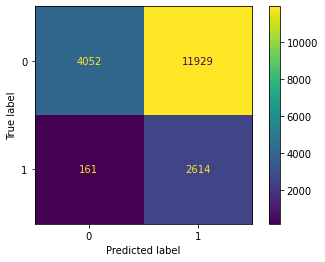

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb_over, X_test, y_test)  

In [ ]:
import pickle
filename = 'model_nb_under.sav'
pickle.dump(nb_under, open(f"/content/gdrive/My Drive/BT4222_Models/{filename}", 'wb'))

In [ ]:
nb_under.fit(X_train_under, y_train_under)

GaussianNB()

In [ ]:
nb_under.score(X_test, y_test)

0.36175090637662616

In [ ]:
predicted_under = nb_under.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted_under))
print(f"Accuracy: {accuracy_score(y_test, predicted_under)}")
print(f"Precision: {precision_score(y_test, predicted_under)}")
print(f"Recall: {recall_score(y_test, predicted_under)}")
print(f"Micro Average Recall: {recall_score(y_test, predicted_under, average='micro')}")
print(f"F1-score: {f1_score(y_test, predicted_under)}")

              precision    recall  f1-score   support

           0       0.96      0.26      0.41     15981
           1       0.18      0.94      0.30      2775

    accuracy                           0.36     18756
   macro avg       0.57      0.60      0.36     18756
weighted avg       0.85      0.36      0.40     18756

Accuracy: 0.36175090637662616
Precision: 0.18082743301402193
Recall: 0.9387387387387387
Micro Average Recall: 0.36175090637662616
F1-score: 0.3032419533205285


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


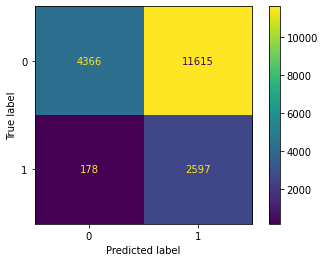

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb_under, X_test, y_test)  

Hyperparameter tuning (for NB)

In [ ]:
X_train_temp, X_val_smote, y_train_temp, y_val_smote = train_test_split(X_train_smote, y_train_smote, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=42)

In [ ]:
import numpy as np 
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# use nb with smote bc highest accuracy 
gs_NB = GridSearchCV(estimator=nb, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
data_transformed = PowerTransformer().fit_transform(X_train)
gs_NB.fit(data_transformed, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
 gs_NB.best_params_

{'var_smoothing': 1.0}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


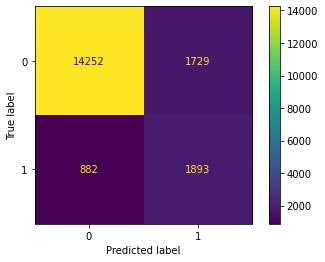

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_NB, PowerTransformer().fit_transform(X_test), y_test)  

In [ ]:
pred_tuned = gs_NB.predict(PowerTransformer().fit_transform(X_test))

In [ ]:
print(classification_report(y_test, pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, pred_tuned)}")
print(f"Precision: {precision_score(y_test, pred_tuned)}")
print(f"Recall: {recall_score(y_test, pred_tuned)}")
print(f"Micro Average Recall: {recall_score(y_test, pred_tuned, average='micro')}")
print(f"F1-score: {f1_score(y_test, pred_tuned)}")

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     15981
           1       0.52      0.68      0.59      2775

    accuracy                           0.86     18756
   macro avg       0.73      0.79      0.75     18756
weighted avg       0.88      0.86      0.87     18756

Accuracy: 0.8607912134783536
Precision: 0.52263942573164
Recall: 0.6821621621621622
Micro Average Recall: 0.8607912134783536
F1-score: 0.5918399249648272


In [ ]:
filename = 'model_gs_nb_tuned.sav'
pickle.dump(gs_NB, open(f"/content/gdrive/My Drive/BT4222_Models/{filename}", 'wb'))

Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline

clf = MultinomialNB()

# rescale to [0,1]
p = Pipeline([('Normalizing',MinMaxScaler()), ('MultinomialNB', clf)])

mnb_scores = cross_val_score(p, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (mean(mnb_scores), std(mnb_scores)))

Mean Accuracy: 0.868 (0.005)


In [ ]:
p.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [ ]:
p.score(X_test, y_test)

0.7809767541053529

In [ ]:
pred = p.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))
print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred, average='micro')}")
print(f"F1-score: {f1_score(y_test, pred)}")

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     15981
           1       0.38      0.79      0.51      2775

    accuracy                           0.78     18756
   macro avg       0.67      0.78      0.69     18756
weighted avg       0.87      0.78      0.81     18756

Accuracy: 0.7801770100234592
Precision: 0.3818787241500175
Recall: 0.7852252252252252
Recall: 0.7801770100234592
F1-score: 0.513854498290296


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


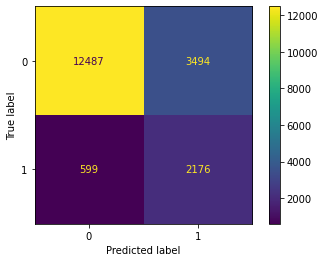

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(p, X_test, y_test)  

In [ ]:
import pickle
filename = 'model_mnb_smote.sav'
pickle.dump(p, open(f"/content/gdrive/My Drive/BT4222_Models/{filename}", 'wb'))

Multinomial without SMOTE

In [ ]:
p2 = Pipeline([('Normalizing',MinMaxScaler()), ('MultinomialNB', MultinomialNB())])

In [ ]:
p2.fit(X_train, y_train)

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [ ]:
p2.score(X_test, y_test)

0.8655896779697163

In [ ]:
pred2 = p2.predict(X_test)

In [ ]:
print(classification_report(y_test, pred2))
print(f"Accuracy: {accuracy_score(y_test, pred2)}")
print(f"Precision: {precision_score(y_test, pred2)}")
print(f"Recall: {recall_score(y_test, pred2)}")
print(f"Micro Average Recall: {recall_score(y_test, pred2, average='micro')}")
print(f"F1-score: {f1_score(y_test, pred2)}")

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15981
           1       0.54      0.56      0.55      2775

    accuracy                           0.87     18756
   macro avg       0.73      0.74      0.74     18756
weighted avg       0.87      0.87      0.87     18756

Accuracy: 0.8655896779697163
Precision: 0.5445614035087719
Recall: 0.5592792792792792
Micro Average Recall: 0.8655896779697163
F1-score: 0.5518222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


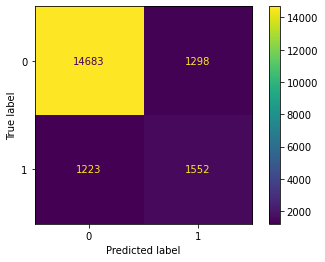

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(p2, X_test, y_test)  

In [ ]:
import pickle
filename = 'model_mnb.sav'
pickle.dump(p2, open(f"/content/gdrive/My Drive/BT4222_Models/{filename}", 'wb'))

Hyperparameter Tuning (MNB)

In [ ]:
p2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Normalizing', 'MultinomialNB', 'Normalizing__clip', 'Normalizing__copy', 'Normalizing__feature_range', 'MultinomialNB__alpha', 'MultinomialNB__class_prior', 'MultinomialNB__fit_prior'])

In [ ]:
import numpy as np 
from sklearn.model_selection import GridSearchCV

params_MNB = {'MultinomialNB__alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=42)

# use nb with smote bc highest accuracy 
gs_MNB = GridSearchCV(estimator=p2, param_grid=params_MNB, cv=cv_method,verbose=1,scoring='accuracy')
gs_MNB.fit(X_train, y_train)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('Normalizing', MinMaxScaler()),
                                       ('MultinomialNB', MultinomialNB())]),
             param_grid={'MultinomialNB__alpha': [1, 0.1, 0.01, 0.001, 0.0001,
                                                  1e-05]},
             scoring='accuracy', verbose=1)

In [ ]:
 gs_MNB.best_params_

{'MultinomialNB__alpha': 0.1}

In [ ]:
results_MNB = pd.DataFrame(gs_MNB.cv_results_['params'])

In [ ]:
results_MNB['test_score'] = gs_MNB.cv_results_['mean_test_score']

In [ ]:
# predict the target on the test dataset
predict_test2 = gs_MNB.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


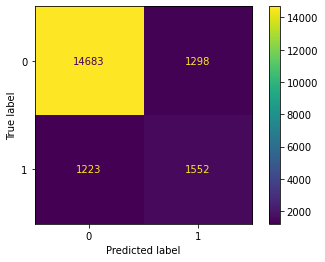

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_MNB, X_test, y_test)  

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_test2), ": is the confusion matrix")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_test2), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, predict_test2), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, predict_test2), ": is the recall score")
print(recall_score(y_test, predict_test2, average='micro'), ": is the micro average recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, predict_test2), ": is the f1 score")

print(classification_report(y_test, predict_test2))

[[14683  1298]
 [ 1223  1552]] : is the confusion matrix
0.8655896779697163 : is the accuracy score
0.5445614035087719 : is the precision score
0.5592792792792792 : is the recall score
0.8655896779697163 : is the micro average recall score
0.5518222222222222 : is the f1 score
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15981
           1       0.54      0.56      0.55      2775

    accuracy                           0.87     18756
   macro avg       0.73      0.74      0.74     18756
weighted avg       0.87      0.87      0.87     18756



In [ ]:
filename = 'model_mnb_smote_tuned.sav'
pickle.dump(p2, open(f"/content/gdrive/My Drive/BT4222_Models/{filename}", 'wb'))